# DSCI 552 Homework 8
Name: Andrew Turangan<br>
USC ID: 1978-4870-80<br>
GitHub Username: Dark-eXe

## Imports

In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, auc
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, SpectralClustering

from scipy.special import softmax

In [2]:
# optional plt style settings
plt.style.use('dark_background')

In [3]:
cwd = os.getcwd()
cwd

'/Users/andrewturangan/Local/DSCI 552/homework-8-Dark-eXe/notebook'

In [4]:
data_dir = cwd[:-8] + 'data/'
data_dir

'/Users/andrewturangan/Local/DSCI 552/homework-8-Dark-eXe/data/'

In [5]:
os.listdir(data_dir)

['wdbc.names',
 'data_banknote_authentication.txt',
 '.ipynb_checkpoints',
 'wdbc.data']

## Supervised, Semi-Supervised, and Unsupervised Learning

In [6]:
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

names = ['ID', 'Diagnosis']
names += [feature + str(i) for i in range(1, 4) for feature in features]

In [7]:
names

['ID',
 'Diagnosis',
 'radius1',
 'texture1',
 'perimeter1',
 'area1',
 'smoothness1',
 'compactness1',
 'concavity1',
 'concave_points1',
 'symmetry1',
 'fractal_dimension1',
 'radius2',
 'texture2',
 'perimeter2',
 'area2',
 'smoothness2',
 'compactness2',
 'concavity2',
 'concave_points2',
 'symmetry2',
 'fractal_dimension2',
 'radius3',
 'texture3',
 'perimeter3',
 'area3',
 'smoothness3',
 'compactness3',
 'concavity3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3']

In [8]:
dataset = pd.read_csv(data_dir + "wdbc.data", names=names).set_index("ID")
dataset

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [9]:
X = dataset.drop('Diagnosis', axis=1)
y = dataset['Diagnosis']

#### Monte-Carlo Simulation:
Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [10]:
overall_results = [] # element --> [type of learning, avg accuracy, avg precision, avg recall, avg F1, avg AUC]

### Supervised Learning

In [11]:
mc_results = []
for M in range(1, 31): # Monte-Carlo Simulation
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=None, shuffle=True, stratify=y) # 20% stratified test set

    # 5-fold CV --> Optimal Lambda
    lam_results = []
    for lam in [0.1, 0.5, 1, 10, 100, 1000]:
        svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
        score = cross_val_score(svc, X_train, y_train, cv=5).mean()
        lam_results.append([lam, score])
    lam_results = pd.DataFrame(lam_results, columns=['Lambda', 'Score'])
    lam = lam_results[lam_results.Score == lam_results.Score.max()].Lambda.values[0]

    # Get predictions and majority class probabilities
    svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_score = svc.decision_function(X_test)

    # Analysis
    accuracy = svc.score(X_test, y_test)
    precision, recall, f1 = precision_score(y_test, y_pred, pos_label="M"), recall_score(y_test, y_pred, pos_label="M"), f1_score(y_test, y_pred, pos_label="M")
    auc = roc_auc_score(y_test, y_score)
    mc_result = [M, accuracy, precision, recall, f1, auc]
    mc_results.append(mc_result)

mc_results = pd.DataFrame(mc_results, columns=["M", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]).set_index("M")
mc_results

,Accuracy,Precision,Recall,F1 Score,AUC
M,,,,,
1,0.991228,1.000000,0.976190,0.987952,0.991733
2,0.964912,0.931818,0.976190,0.953488,0.996032
3,0.947368,0.909091,0.952381,0.930233,0.986772
4,0.973684,0.953488,0.976190,0.964706,0.998347
5,0.938596,0.926829,0.904762,0.915663,0.983796
6,0.964912,0.975000,0.928571,0.951220,0.955357
7,0.964912,0.952381,0.952381,0.952381,0.998347
8,0.956140,0.951220,0.928571,0.939759,0.991402
9,0.964912,0.975000,0.928571,0.951220,0.992063


In [12]:
overall_result = ["Supervised", mc_results.Accuracy.mean(), mc_results.Precision.mean(), mc_results.Recall.mean(), mc_results["F1 Score"].mean(), mc_results.AUC.mean()]
overall_results.append(overall_result)

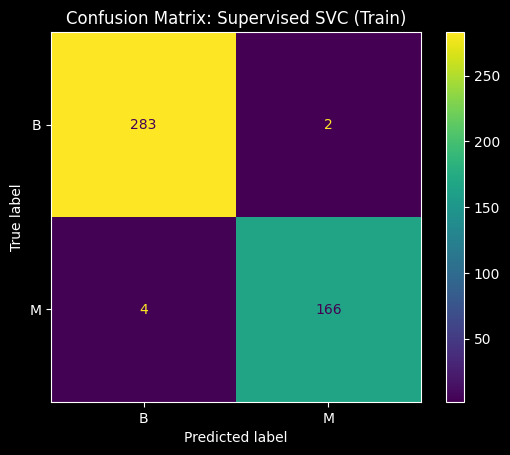

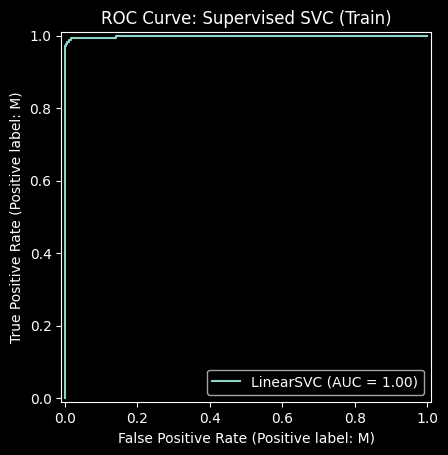

In [13]:
ConfusionMatrixDisplay.from_predictions(y_train, svc.predict(X_train))
plt.title('Confusion Matrix: Supervised SVC (Train)')
RocCurveDisplay.from_estimator(svc, X_train, y_train)
plt.title('ROC Curve: Supervised SVC (Train)')
plt.show()

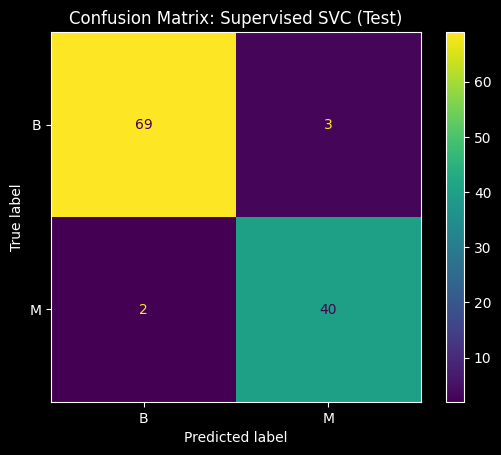

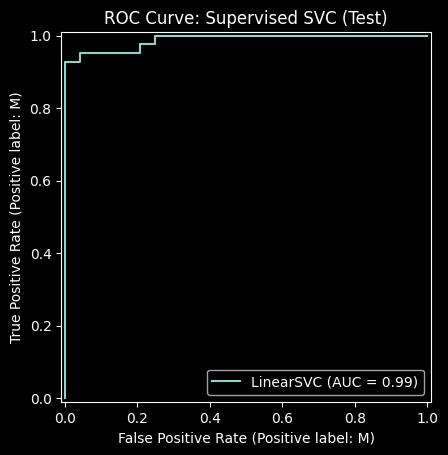

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, svc.predict(X_test))
plt.title("Confusion Matrix: Supervised SVC (Test)")
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.title("ROC Curve: Supervised SVC (Test)")
plt.show()

## Semi-Supervised Learning/Self Training

In [15]:
# normalization
X_norm = normalize(X, norm='l1', axis=0)
X_norm = pd.DataFrame(X_norm, columns=names[2:])
X_norm['ID'] = X.index
X_norm = X_norm.set_index("ID")

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=None, shuffle=True, stratify=y) # 20% stratified test set

In [16]:
mc_results = []
for M in range(1, 31):

    X_labeled, X_unlabeled, y_labeled, garbage = train_test_split(
        X_train, y_train, test_size=0.5, random_state=None, shuffle=True, stratify=y_train) # 50% stratified labeled/unlabeled sets

    # 5-fold CV --> Optimal Lambda
    lam_results = []
    for lam in [0.1, 0.5, 1, 10, 100, 1000]:
        svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
        score = cross_val_score(svc, X_labeled, y_labeled, cv=5).mean()
        lam_results.append([lam, score])
    lam_results = pd.DataFrame(lam_results, columns=['Lambda', 'Score'])
    lam = lam_results[lam_results.Score == lam_results.Score.max()].Lambda.values[0]

    # Semi-Supervised Learning
    svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
    while len(X_unlabeled) > 0:
        svc.fit(X_labeled, y_labeled)

        X_unlabeled['Hyperplane_Distance'] = svc.decision_function(X_unlabeled)
        target = abs(X_unlabeled['Hyperplane_Distance']).max()
        X_target = X_unlabeled[abs(X_unlabeled['Hyperplane_Distance']) == target].drop('Hyperplane_Distance', axis=1)

        X_target['Diagnosis'] = svc.predict(X_target)
        X_labeled = pd.concat([X_labeled, X_target.drop('Diagnosis', axis=1)])
        y_labeled = pd.concat([y_labeled, X_target['Diagnosis']])

        X_unlabeled = X_unlabeled.drop(X_target.index)
        X_unlabeled = X_unlabeled.drop('Hyperplane_Distance', axis=1)

    # Get predictions and majority class probabilities
    svc.fit(X_labeled, y_labeled)
    y_pred = svc.predict(X_test)
    y_score = svc.decision_function(X_test)

    # Analysis
    accuracy = svc.score(X_test, y_test)
    precision, recall, f1 = precision_score(y_test, y_pred, pos_label="M"), recall_score(y_test, y_pred, pos_label="M"), f1_score(y_test, y_pred, pos_label="M")
    auc = roc_auc_score(y_test, y_score)
    mc_result = [M, accuracy, precision, recall, f1, auc]
    mc_results.append(mc_result)

mc_results = pd.DataFrame(mc_results, columns=["M", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]).set_index("M")
mc_results

,Accuracy,Precision,Recall,F1 Score,AUC
M,,,,,
1,0.947368,0.950000,0.904762,0.926829,0.984458
2,0.912281,0.847826,0.928571,0.886364,0.981151
3,0.956140,0.951220,0.928571,0.939759,0.994048
4,0.921053,0.971429,0.809524,0.883117,0.985450
5,0.938596,0.906977,0.928571,0.917647,0.976190
6,0.894737,0.840909,0.880952,0.860465,0.978836
7,0.938596,0.926829,0.904762,0.915663,0.972222
8,0.938596,0.888889,0.952381,0.919540,0.981481
9,0.956140,0.974359,0.904762,0.938272,0.984458


In [17]:
overall_result = ["Semi-Supervised", mc_results.Accuracy.mean(), mc_results.Precision.mean(), mc_results.Recall.mean(), mc_results["F1 Score"].mean(), mc_results.AUC.mean()]
overall_results.append(overall_result)

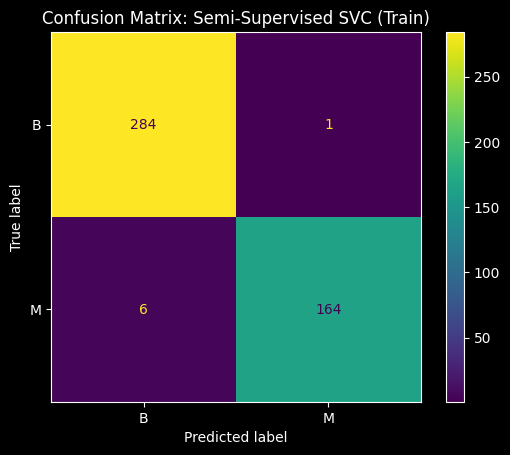

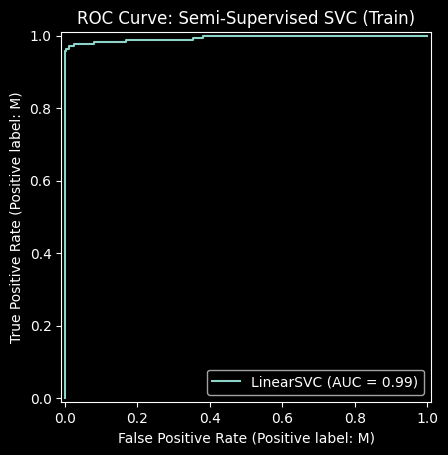

In [18]:
ConfusionMatrixDisplay.from_predictions(y_train, svc.predict(X_train))
plt.title('Confusion Matrix: Semi-Supervised SVC (Train)')
RocCurveDisplay.from_estimator(svc, X_train, y_train) 
plt.title('ROC Curve: Semi-Supervised SVC (Train)')
plt.show()

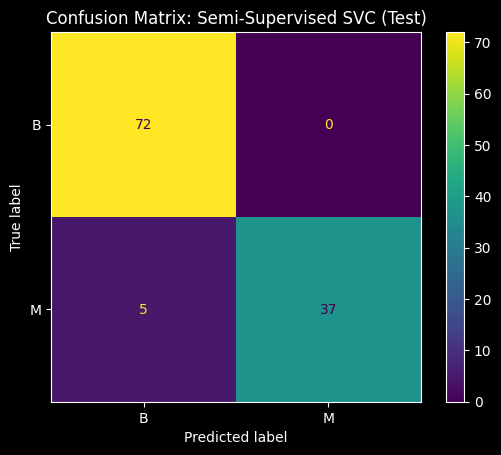

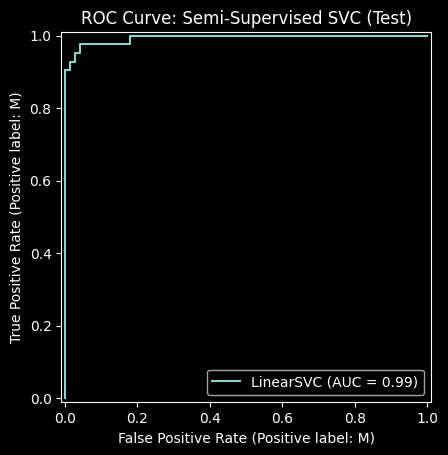

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, svc.predict(X_test))
plt.title("Confusion Matrix: Semi-Supervised SVC (Test)")
RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.title("ROC Curve: Semi-Supervised SVC (Test)")
plt.show()

### Unsupervised Learning

In [180]:
# normalization
X_norm = normalize(X, norm='l1', axis=0)
X_norm = pd.DataFrame(X_norm, columns=names[2:])
X_norm['ID'] = X.index
X_norm = X_norm.set_index("ID")

In [181]:
def best_model():
    # avoid local minima <--- run KMeans multiple times and choose model instance with lowest intra-cluster variance
    lowest_variance = None
    best_model = None
    X_pred = X_train.copy()
    for i in range(500):
        kmeans = KMeans(n_clusters=2, random_state=None) # randomness: cluster centroid initialization
        kmeans.fit(X_train)
        y_pred = kmeans.predict(X_train)
    
        X_pred['Cluster'] = y_pred
        vars = []
        for col in X.columns:
            vars.append(X_pred[X_pred['Cluster'] == 0][col].var())
            vars.append(X_pred[X_pred['Cluster'] == 1][col].var())
        variance = np.asarray(vars).mean()
        if not lowest_variance:
            lowest_variance = variance
            best_model = kmeans
        elif variance < lowest_variance:
            lowest_variance = variance
            best_model = kmeans
    return best_model

In [182]:
def centroid_distances(X_pred, centroid_0, centroid_1): # X_pred := X with KMeans Clusters labels
    distances = []
    for point in X_pred.index:
        if X_pred.loc[point].Cluster == 0:
            distance = np.linalg.norm(centroid_0 - X_pred.drop('Cluster', axis=1).loc[point])
        else:
            distance = np.linalg.norm(centroid_1 - X_pred.drop('Cluster', axis=1).loc[point])
        distances.append(distance)
    return distances

In [183]:
def kmeans_analysis(y_true, y_pred): # return [accuracy, precision, recall, f1]
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1 = precision_score(y_true, y_pred, pos_label="M"), recall_score(y_true, y_pred, pos_label="M"), f1_score(y_true, y_pred, pos_label="M")
    return [accuracy, precision, recall, f1]

In [184]:
mc_results_train = []
mc_results_test = []
for M in range(1, 31):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_norm, y, test_size=0.2, random_state=None, shuffle=True, stratify=y) # 20% stratified test set

    # Train
    kmeans = best_model()
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_train)
    X_pred = X_train.copy()
    X_pred['Cluster'] = y_pred

    # Classify by majority of 30 closest points to each cluster
    centroid_0, centroid_1 = kmeans.cluster_centers_
    X_pred['Centroid_Distances'] = centroid_distances(X_pred, centroid_0, centroid_1)
    closest_0 = X_pred[X_pred.Cluster==0].sort_values('Centroid_Distances').iloc[:30]
    closest_1 = X_pred[X_pred.Cluster==1].sort_values('Centroid_Distances').iloc[:30]

    closest_0['Diagnosis'] = y.loc[closest_0.index]
    closest_1['Diagnosis'] = y.loc[closest_1.index]
    majority_0 = closest_0.Diagnosis.mode().values[0]
    majority_1 = closest_1.Diagnosis.mode().values[0]

    X_pred = X_pred.drop('Centroid_Distances', axis=1)
    y_pred = X_pred.Cluster.map({0: majority_0, 1: majority_1})
    y_pred_train = y_pred # for displays

    # Train Analysis
    mc_result_train = [M] + kmeans_analysis(y_train, y_pred)
    y_score = softmax(centroid_distances(X_pred, centroid_0, centroid_1))
    auc = roc_auc_score(y_train, y_score)
    mc_result_train.append(auc)
    mc_results_train.append(mc_result_train)

    # Test
    y_pred = kmeans.predict(X_test)
    X_pred = X_test.copy()
    X_pred['Cluster'] = y_pred

    # Classify by majority of 30 closest points to each cluster
    X_pred['Centroid_Distances'] = centroid_distances(X_pred, centroid_0, centroid_1)
    closest_0 = X_pred[X_pred.Cluster==0].sort_values('Centroid_Distances').iloc[:30]
    closest_1 = X_pred[X_pred.Cluster==1].sort_values('Centroid_Distances').iloc[:30]
    
    closest_0['Diagnosis'] = y.loc[closest_0.index]
    closest_1['Diagnosis'] = y.loc[closest_1.index]
    majority_0 = closest_0.Diagnosis.mode().values[0]
    majority_1 = closest_1.Diagnosis.mode().values[0]

    X_pred = X_pred.drop('Centroid_Distances', axis=1)
    y_pred = X_pred.Cluster.map({0: majority_0, 1: majority_1})

    # Test Analysis
    mc_result_test = [M] + kmeans_analysis(y_test, y_pred)
    y_score = softmax(centroid_distances(X_pred, centroid_0, centroid_1))
    auc = roc_auc_score(y_test, y_score)
    mc_result_test.append(auc)
    mc_results_test.append(mc_result_test)

mc_results_train = pd.DataFrame(mc_results_train, columns=["M", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]).set_index("M")
mc_results_test = pd.DataFrame(mc_results_test, columns=["M", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]).set_index("M")

In [185]:
overall_result = ["Unsupervised (Train)", mc_results_train.Accuracy.mean(), mc_results_train.Precision.mean(), mc_results_train.Recall.mean(), mc_results_train["F1 Score"].mean(), mc_results_train.AUC.mean()]
overall_results.append(overall_result)

overall_result = ["Unsupervised (Test)", mc_results_test.Accuracy.mean(), mc_results_test.Precision.mean(), mc_results_test.Recall.mean(), mc_results_test["F1 Score"].mean(), mc_results_test.AUC.mean()]
overall_results.append(overall_result)

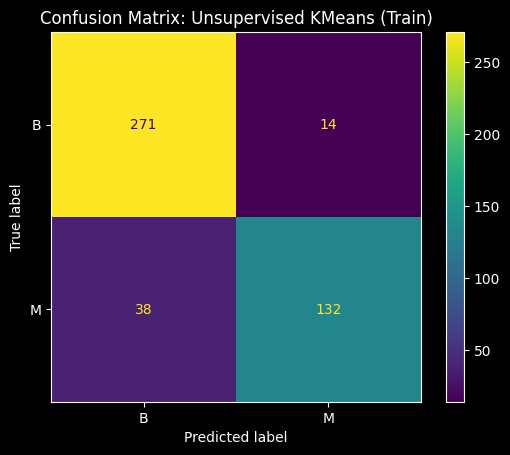

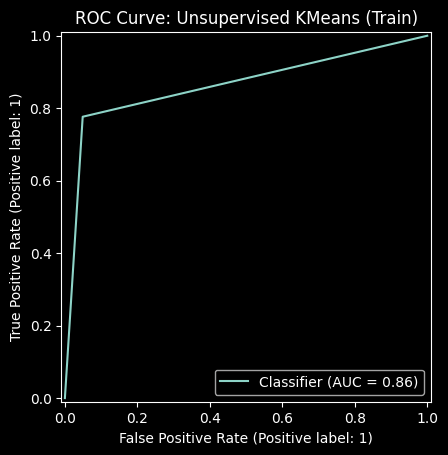

In [186]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.title('Confusion Matrix: Unsupervised KMeans (Train)')
RocCurveDisplay.from_predictions(y_train.map({'B':0, 'M':1}), y_pred_train.map({'B':0, 'M':1})) 
plt.title('ROC Curve: Unsupervised KMeans (Train)')
plt.show()

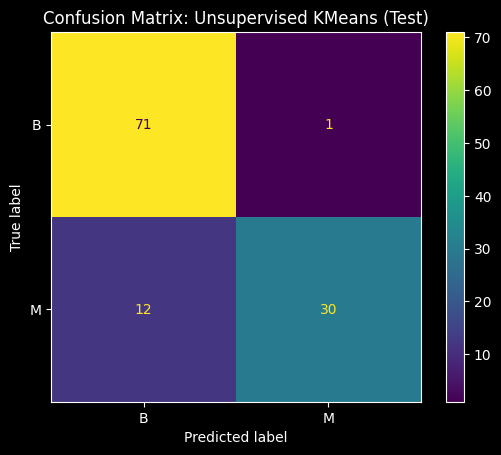

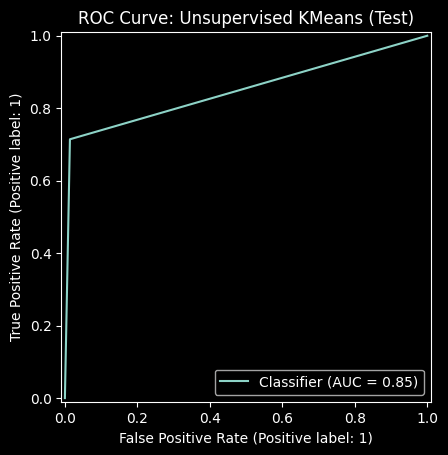

In [187]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix: Unsupervised KMeans (Test)')
RocCurveDisplay.from_predictions(y_test.map({'B':0, 'M':1}), y_pred.map({'B':0, 'M':1})) 
plt.title('ROC Curve: Unsupervised KMeans (Test)')
plt.show()

### Spectral Clustering

In [285]:
def classify_cluster(cluster, M_threshold=0.5):
    count_M = len(cluster[cluster == 'M'])
    if count_M / len(cluster) > M_threshold:
        return 'M'
    return 'B'

In [291]:
def get_roc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0])
    return [fpr, tpr]

In [293]:
clustering = SpectralClustering(n_clusters=2, gamma=1)
y_pred = clustering.fit_predict(X_norm)

In [294]:
y_pred = pd.DataFrame(y_pred, columns=['Cluster']).set_index(y.index)

In [295]:
# classify to majority label of each cluster
cluster_0 = y.loc[y_pred[y_pred['Cluster'] == 0].index]
cluster_1 = y.loc[y_pred[y_pred['Cluster'] == 1].index]

In [296]:
label_0 = classify_cluster(cluster_0)
label_1 = classify_cluster(cluster_1)

In [297]:
y_pred['Diagnosis'] = y_pred['Cluster'].map({0: label_0, 1: label_1})

In [298]:
accuracy, precision, recall, f1 = kmeans_analysis(y, y_pred['Diagnosis'])

In [317]:
fprGraph = []
tprGraph = []
for M_threshold in np.linspace(1, 0, 100):
    label_0 = classify_cluster(cluster_0, M_threshold=M_threshold)
    label_1 = classify_cluster(cluster_1, M_threshold=M_threshold)

    yGraph = y_pred['Cluster'].map({0: label_0, 1: label_1})
    fpr, tpr = get_roc(y, yGraph)
    fprGraph.append(fpr)
    tprGraph.append(tpr)
aucGraph = auc(fprGraph, tprGraph)

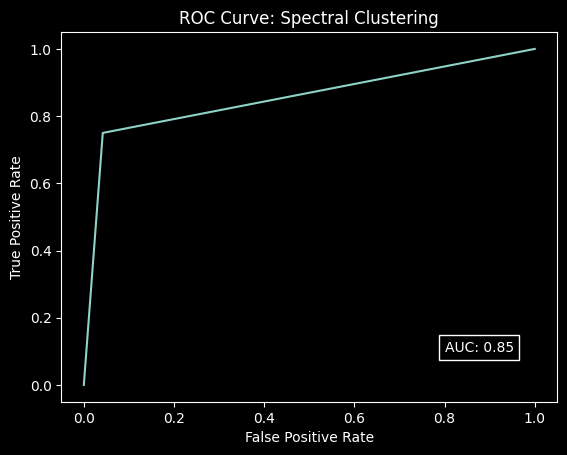

In [328]:
plt.plot(fprGraph, tprGraph)
plt.title('ROC Curve: Spectral Clustering')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.8, .1, f"AUC: {aucGraph:.2f}", bbox=dict(facecolor='none', edgecolor='white'))
plt.show()

In [330]:
overall_results.append(['Unsupervised (Spectral)', accuracy, precision, recall, f1, aucGraph])

### Overall Results

In [332]:
overall_results = pd.DataFrame(overall_results, columns=['Learning Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC Area Under Curve']).set_index('Learning Method')

In [335]:
overall_results

,Accuracy,Precision,Recall,F1 Score,ROC Area Under Curve
Learning Method,,,,,
Supervised,0.964620,0.952321,0.952381,0.952006,0.991501
Semi-Supervised,0.944152,0.944411,0.903968,0.922897,0.982981
Unsupervised (Train),0.887106,0.920075,0.764510,0.834836,0.808867
Unsupervised (Test),0.889766,0.926098,0.763492,0.835719,0.821748
Unsupervised (Spectral),0.880492,0.913793,0.750000,0.823834,0.853992


As expected, almost all metrics indicate the declining performance of models from supervised to semi-supervised to unsupervised.

## Active Learning Using Support Vector Machines

In [338]:
names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
dataset = pd.read_csv(data_dir + 'data_banknote_authentication.txt', names=names)

In [339]:
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [377]:
def valid_tmp(tmp):
    if (dataset.loc[tmp]['class'] == 0).all():
        return False
    elif (dataset.loc[tmp]['class'] == 1).all():
        return False
    return True

In [342]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 472 / len(dataset))

In [394]:
# passive learning
population = list(X_train.index)
pool = []
test_scores_passive = []
while len(population) > 0:
    tmp = random.sample(population, k=10)
    while not valid_tmp(tmp):
        tmp = random.sample(population, k=10)
        
    pool += tmp
    for x in tmp:
        population.remove(x)

    # 5-fold CV --> Optimal Lambda
    lam_results = []
    for lam in [0.1, 0.5, 1, 10, 100, 1000]:
        svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
        score = cross_val_score(svc, X_train.loc[pool], y_train.loc[pool], cv=5).mean()
        lam_results.append([lam, score])
    lam_results = pd.DataFrame(lam_results, columns=['Lambda', 'Score'])
    lam = lam_results[lam_results.Score == lam_results.Score.max()].Lambda.values[0]

    svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
    svc.fit(X_train.loc[pool], y_train.loc[pool])

    test_scores_passive.append(svc.score(X_test, y_test))

In [470]:
population = list(X_train.index)
pool = []
test_scores_active = []

# 1st iteration w/o active learning
tmp = random.sample(population, k=10)
while not valid_tmp(tmp):
    tmp = random.sample(population, k=10)
pool += tmp
for x in tmp:
    population.remove(x)
# 5-fold CV --> Optimal Lambda
lam_results = []
for lam in [0.1, 0.5, 1, 10, 100, 1000]:
    svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
    score = cross_val_score(svc, X_train.loc[pool], y_train.loc[pool], cv=5).mean()
    lam_results.append([lam, score])
lam_results = pd.DataFrame(lam_results, columns=['Lambda', 'Score'])
lam = lam_results[lam_results.Score == lam_results.Score.max()].Lambda.values[0]
svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
svc.fit(X_train.loc[pool], y_train.loc[pool])
test_scores_active.append(svc.score(X_test, y_test))

# active learning
while len(population) > 0:

    X_pop = X_train.loc[population].copy()
    X_pop['Centroid_Distance'] = abs(svc.decision_function(X_pop))
    closest_10 = X_pop.sort_values('Centroid_Distance').iloc[:10].index
    pool += list(closest_10)
    for x in closest_10:
        population.remove(x)

    # 5-fold CV --> Optimal Lambda
    lam_results = []
    for lam in [0.1, 0.5, 1, 10, 100, 1000]:
        svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
        score = cross_val_score(svc, X_train.loc[pool], y_train.loc[pool], cv=5).mean()
        lam_results.append([lam, score])
    lam_results = pd.DataFrame(lam_results, columns=['Lambda', 'Score'])
    lam = lam_results[lam_results.Score == lam_results.Score.max()].Lambda.values[0]

    svc = LinearSVC(penalty='l1', C=lam, max_iter=500000, dual=False)
    svc.fit(X_train.loc[pool], y_train.loc[pool])

    test_scores_active.append(svc.score(X_test, y_test))

/Users/andrewturangan/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/andrewturangan/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/andrewturangan/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/andrewturangan/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/andrewturangan/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has

In [471]:
results = pd.DataFrame([np.arange(10, 901, 10), test_scores_passive, test_scores_active]).T
results.columns = ["N", "Accuracy (Passive)", "Accuracy (Active)"]
results = results.set_index("N")
results

,Accuracy (Passive),Accuracy (Active)
N,,
10.0,0.957627,0.843220
20.0,0.953390,0.972458
30.0,0.970339,0.989407
40.0,0.970339,0.989407
50.0,0.970339,0.987288
...,...,...
860.0,0.989407,0.989407
870.0,0.989407,0.989407
880.0,0.989407,0.989407


In [472]:
results.mean()

Accuracy (Passive)    0.987053
Accuracy (Active)     0.986841
dtype: float64

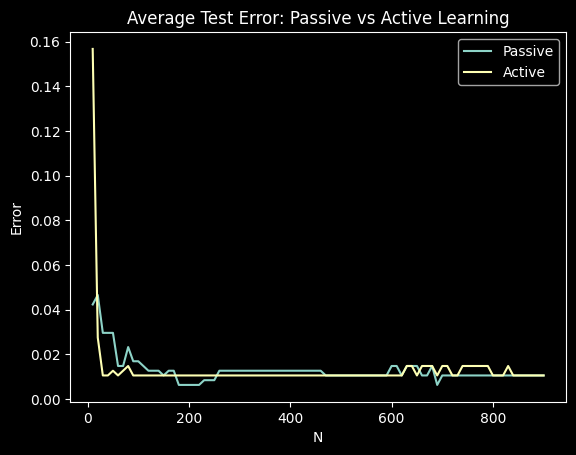

In [473]:
plt.plot(results.index, 1 - results['Accuracy (Passive)'], label="Passive")
plt.plot(results.index, 1 - results['Accuracy (Active)'], label="Active")
plt.legend()
plt.title("Average Test Error: Passive vs Active Learning")
plt.xlabel("N")
plt.ylabel("Error")
plt.show()

## Web References
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html<br>
